In [37]:
from tensorflow.keras import datasets, utils


def make_data():
    # 다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    # 원 핫 인코딩 처리
    y_train = utils.to_categorical(y_train, 10)
    y_test = utils.to_categorical(y_test, 10)

    # 데이터 정규화
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    X_train /= 255
    X_test /= 255

    return (X_train, y_train), (X_test, y_test)

In [38]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout


def make_model():
    model = Sequential()
    # padding="same" 출력크기를 입력크기와 같게 유지
    model.add(
        Conv2D(
            32, (3, 3), padding="same", input_shape=X_train.shape[1:], activation="relu"
        )
    )
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    # 학습률 0.0001, decay 학습속도를 감소시키는 옵션
    opt = optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

In [39]:
a = isinstance(1, int)
b = isinstance(1.2, float)

In [40]:
def plot_loss(history, title=None):
    # history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])

    # 타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)
    plt.ylabel("loss")
    plt.xlabel("epch")
    plt.legend(["Train", "Test"], loc=0)

In [41]:
def plo_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])

    if title is not None:
        plt.title(title)
    plt.ylabel("accuracy")
    plt.xlabel("epch")
    plt.legend(["Train", "Test"], loc=0)

In [42]:
(X_train, y_train), (X_test, y_test) = make_data()

In [43]:
X_train.shape

(50000, 32, 32, 3)

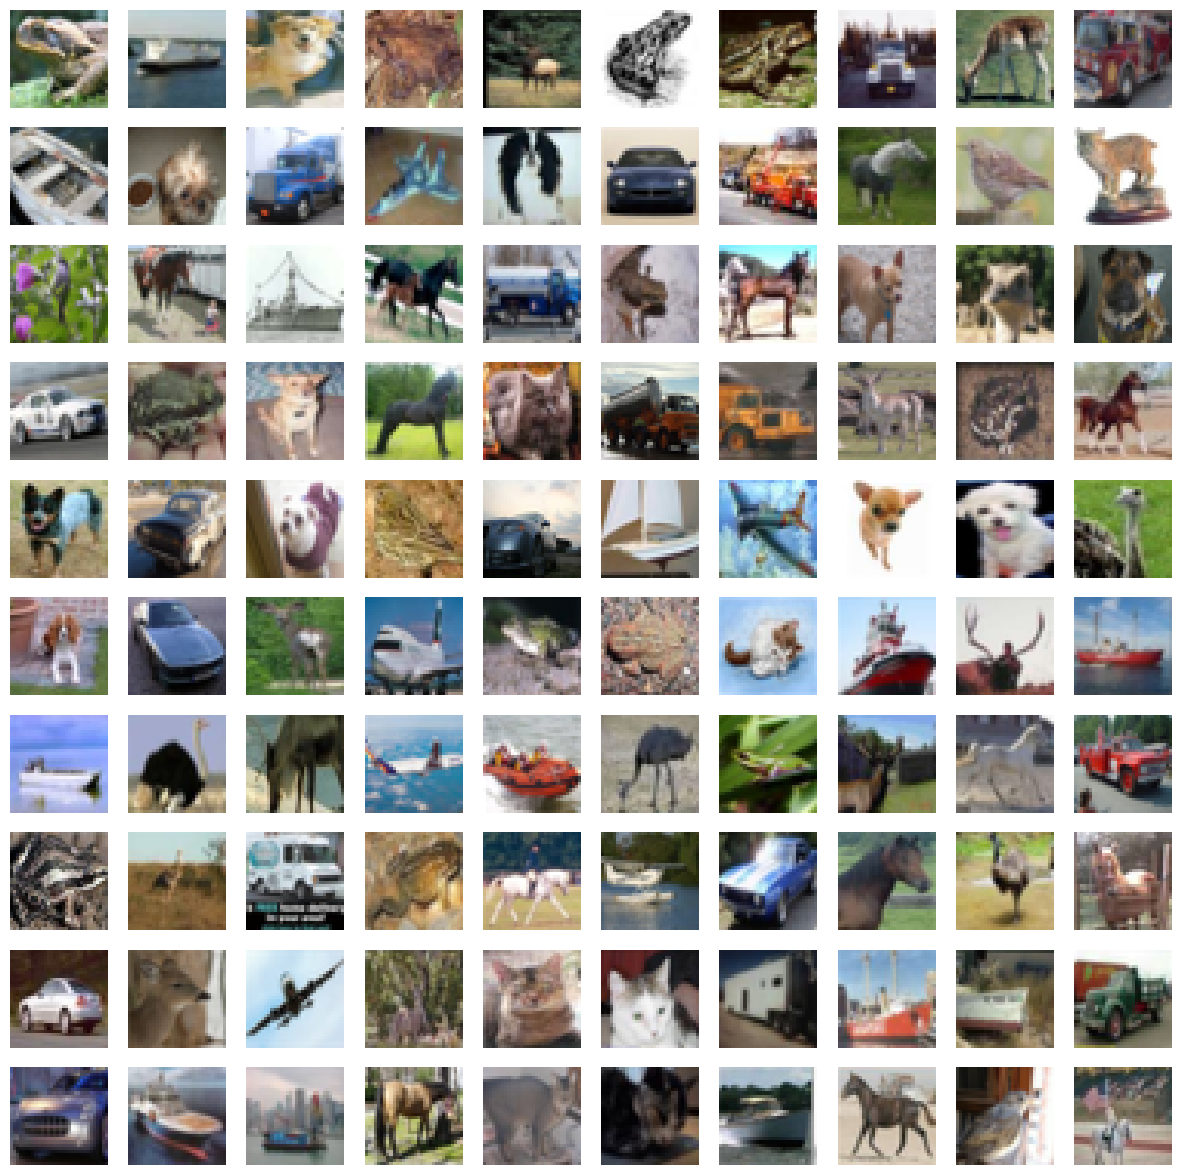

In [44]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes1 = plt.subplots(10, 10, figsize=(15, 15))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i : i + 1][0])

In [45]:
# 모델 생성
model = make_model()

In [46]:
import tensorflow as tf

with tf.device("/GPU:0"):
    history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 41s 33ms/step - loss: 1.8326 - accuracy: 0.3436 - val_loss: 1.6104 - val_accuracy: 0.4498
Epoch 2/3
1250/1250 [==============================] - 38s 31ms/step - loss: 1.5193 - accuracy: 0.4600 - val_loss: 1.4773 - val_accuracy: 0.4846
Epoch 3/3
1250/1250 [==============================] - 40s 32ms/step - loss: 1.3778 - accuracy: 0.5095 - val_loss: 1.3568 - val_accuracy: 0.5301


In [47]:
# 성능 평가
performance_test = model.evaluate(X_test, y_test, batch_size=128)
print(performance_test)

79/79 [==============================] - 1s 15ms/step - loss: 1.3331 - accuracy: 0.5331
[1.3331325054168701, 0.5331000089645386]


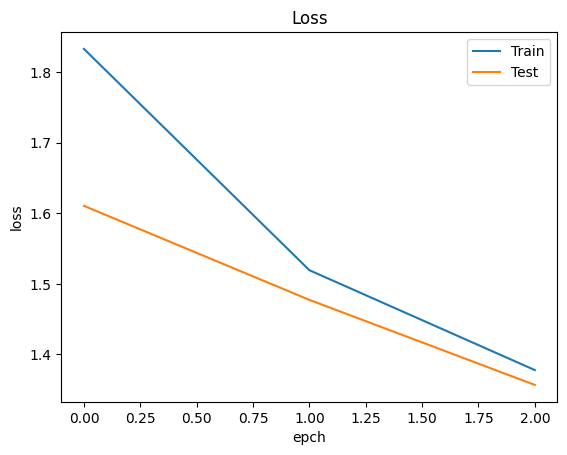

In [48]:
import matplotlib

plot_loss(history, "Loss")
plt.show()

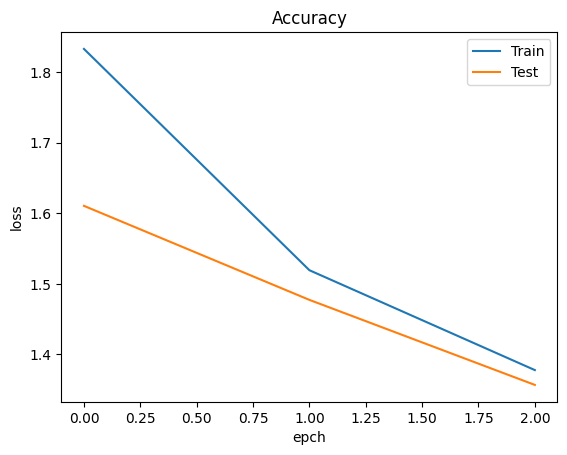

In [49]:
plot_loss(history, "Accuracy")
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
confusion_matrix(np.argmax(y_test, axis=1), y_pred)

313/313 [==============================] - 2s 6ms/step


array([[570,  96,  46,   9,   3,   2,  29,  10, 201,  34],
       [ 23, 821,   5,   3,   2,   2,  18,  12,  49,  65],
       [ 95,  42, 442,  63,  62,  33, 146,  53,  48,  16],
       [ 37,  47,  90, 314,  57,  78, 214,  72,  43,  48],
       [ 45,  25, 190,  53, 366,  14, 168,  94,  31,  14],
       [ 16,  27, 131, 210,  65, 259, 112, 113,  40,  27],
       [ 10,  29,  77,  22,  36,   4, 772,  16,  14,  20],
       [ 23,  33,  57,  57,  62,  45,  56, 584,  18,  65],
       [ 90, 116,   8,   8,   3,   3,  11,  11, 725,  25],
       [ 35, 311,  10,  12,   5,   2,  35,  19,  93, 478]], dtype=int64)

In [51]:
model.save('c:/data/cifar/cifar.h5')